# Breast Cancer Classification

- Objective : Developing a machine learning model for Breast Cancer Classification.

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install ucimlrepo
!{sys.executable} -m pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 9.3/9.3 MB 4.3 MB/s eta 0:00:00
   --------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1


In [2]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo # For Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score

## Data Collection

- Dataset : Breast Cancer Wisconsin (Original)
- Link : https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
- Additional Information : 
Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)
Group 2:  70 instances (October 1989)
Group 3:  31 instances (February 1990)
Group 4:  17 instances (April 1990)
Group 5:  48 instances (August 1990)
Group 6:  49 instances (Updated January 1991)
Group 7:  31 instances (June 1991)
Group 8:  86 instances (November 1991)
-----------------------------------------
Total:   699 points (as of the donated datbase on 15 July 1992)

In [3]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# # metadata 
# print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

Here, Class is Target variable. If the cells in the tumor are normal, it's benign. If they're abnormal and grow uncontrollably, they're cancerous cells and the tumor is malignant.

In [4]:
data = x
data['Class'] = y

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_11180\1108672124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'] = y


## Data Cleaning

In [5]:
# Finding missing values in columns
total = data.isnull().sum()
total

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [6]:
# Droping rows where 'Bare_nuclei' column has missing values
data = data.dropna(subset=['Bare_nuclei'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              683 non-null    int64  
 1   Uniformity_of_cell_size      683 non-null    int64  
 2   Uniformity_of_cell_shape     683 non-null    int64  
 3   Marginal_adhesion            683 non-null    int64  
 4   Single_epithelial_cell_size  683 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              683 non-null    int64  
 7   Normal_nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class                        683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


In [7]:
# Finding Duplicate data
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695     True
696    False
697    False
698    False
Length: 683, dtype: bool


In [8]:
# Droping rows where duplicate data found
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              449 non-null    int64  
 1   Uniformity_of_cell_size      449 non-null    int64  
 2   Uniformity_of_cell_shape     449 non-null    int64  
 3   Marginal_adhesion            449 non-null    int64  
 4   Single_epithelial_cell_size  449 non-null    int64  
 5   Bare_nuclei                  449 non-null    float64
 6   Bland_chromatin              449 non-null    int64  
 7   Normal_nucleoli              449 non-null    int64  
 8   Mitoses                      449 non-null    int64  
 9   Class                        449 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 38.6 KB


C:\Users\Dhruv\AppData\Local\Temp\ipykernel_11180\246716266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


## Data Correlation

In [9]:
cormat = data.corr()
round(cormat, 2)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.00,0.57,0.58,0.38,0.43,0.51,0.49,0.44,0.29,0.67
Uniformity_of_cell_size,0.57,1.00,0.88,0.64,0.69,0.59,0.71,0.65,0.40,0.76
Uniformity_of_cell_shape,0.58,0.88,1.00,0.61,0.65,0.62,0.68,0.65,0.38,0.76
Marginal_adhesion,0.38,0.64,0.61,1.00,0.52,0.59,0.61,0.51,0.36,0.63
Single_epithelial_cell_size,0.43,0.69,0.65,0.52,1.00,0.48,0.55,0.56,0.43,0.61
Bare_nuclei,0.51,0.59,0.62,0.59,0.48,1.00,0.61,0.48,0.26,0.76
Bland_chromatin,0.49,0.71,0.68,0.61,0.55,0.61,1.00,0.60,0.28,0.71
Normal_nucleoli,0.44,0.65,0.65,0.51,0.56,0.48,0.60,1.00,0.37,0.65
Mitoses,0.29,0.40,0.38,0.36,0.43,0.26,0.28,0.37,1.00,0.36
Class,0.67,0.76,0.76,0.63,0.61,0.76,0.71,0.65,0.36,1.00


<AxesSubplot:>

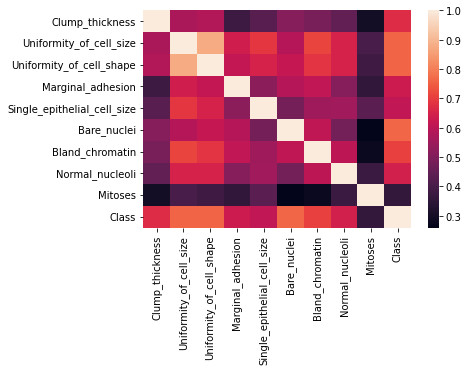

In [10]:
sns.heatmap(cormat)

Correlation matrix shows that except Mitoses features every other features correlating with CLass

In [11]:
y = data['Class']
y.shape

(449,)

In [12]:
# Droping 'Mitoses' feature from the training data
x = data.drop(['Mitoses', 'Class'], axis = 1)
x.shape

(449, 8)

In [13]:
# Splitting data for model training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, test_size=0.2, shuffle=True)

In [14]:
x_train.shape

(359, 8)

In [15]:
x_test.shape

(90, 8)

## Model Training

In [16]:
# Training our logistic regression mode

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [17]:
# Predicting our data
y_pred = lr.predict(x_test)

## Model Evaluation

In [18]:
# Finding Precision, Recall and F1-score

precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
print(precision, recall, fscore)

0.9466666666666665 0.9444444444444444 0.9445062415029045


In [19]:
# Finding Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9444444444444444


In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  4]
 [ 1 41]]


## End of this module

- Created by : Dhruv Patel
- Github : https://github.com/dhruvldrp9
- Email : dhruv.ldrp9@gmail.com
- Linkedin : www.linkedin.com/in/dhruvp9